In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# --- 0. プロット設定 ---
plt.rcParams['font.family'] = "Meiryo"
plt.rcParams['figure.dpi'] = 100


# --- 2. データの読み込みと準備 ---
print("実験データを読み込みます...")
file_path = "Circular_Polarization_B_Field.xlsx"
sheet_name = "Sheet2"
# pandasを使ってExcelファイルからデータを読み込む
# ファイル名を適宜確認・変更してください
try:
    df = pd.read_excel(file_path, sheet_name=sheet_name, header=0, names=['Frequency (THz)', 'Transmittance'])
    # A列とB列をそれぞれx, yとして読み込む
   #exp_freq_thz = df.iloc[1:, 0].values
   #exp_transmittance = df.iloc[1:, 1].values
    exp_freq_thz = df['Frequency (THz)'].to_numpy(dtype=float)
    exp_transmittance = df['Transmittance (7.7T)'].to_numpy(dtype=float)
    print(f"データの読み込みに成功しました。読み込み件数: {len(df)}件")
except FileNotFoundError:
    print(f"エラー: ファイルが見つかりません。パスを確認してください。\nパス: {file_path}")
    exit()
except Exception as e:
    # その他のエラー（例：シート名が違うなど）もキャッチ
    print(f"データの読み込み中にエラーが発生しました: {e}")
    exit()

print(df)
print('-' * 30)

# a) ピーク（極大値）の検出
peak_indicates_all, _ = find_peaks(exp_transmittance, prominence=1e-4)

peak_data_all = df.iloc[peak_indicates_all]

print("\n--- 検出されたピーク ---")
print(peak_data_all)
print("-" * 30) 

# b) バレー（極小値）の検出
# ★★★ データを反転させて、そのピークを探す ★★★
y_inverted_all = -exp_transmittance
valley_indices_all, _ = find_peaks(y_inverted_all, prominence=1e-4)
valley_data_all = df.iloc[valley_indices_all]
print("\n--- 検出されたバレー（谷）---")
print(valley_data_all)

# --- 3. 結果の可視化 ---
fig, ax = plt.subplots(figsize=(10, 6))

# 元のデータをプロット
ax.plot(exp_freq_thz, exp_transmittance, 'o', color='blue', markersize=4, label='実験データ')


# 検出されたピークをプロット
ax.plot(peak_data_all['Frequency (THz)'], peak_data_all['Transmittance'], 
        'x', color='red', markersize=10, label='検出されたピーク')

# 検出されたバレーをプロット
ax.plot(valley_data_all['Frequency (THz)'], valley_data_all['Transmittance'], 
        'v', color='green', markersize=10, label='バレー（谷）', zorder=2)


ax.set_xlabel('周波数 (THz)')
ax.set_ylabel('透過率 ')
ax.set_title('実験結果')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()
plt.close()

実験データを読み込みます...
データの読み込み中にエラーが発生しました: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.


NameError: name 'df' is not defined

: 

In [ ]:
# 高次周波数(j次)に基づく膜厚の手計算
def calculate_thickness_from_peaks(j, peak_freqs):
    c = 299792458  # 光速 (m/s)
    n = 3.8 # 屈折率
    # ピーク周波数をTHzからHzに変換
    peak_freqs = peak_freqs * 1e12  # THz to Hz
    # ピーク周波数から膜厚を計算
    d_calculated = j * (c / (2 * n)) / peak_freqs
    d_calculated = d_calculated * 1e6  # m to μm 
    return d_calculated

In [ ]:
d_calculated = []
# ピーク周波数から膜厚を計算
for j in range(2, 4): 
	thickness = calculate_thickness_from_peaks(j, peak_data_all['Frequency (THz)'].iloc[j])
	d_calculated.append(thickness)
	print(f"{j}次周波数に基づく膜厚の計算結果: {thickness:.3f}μm")

d_average = np.mean(d_calculated)
print(f"\n平均膜厚: {d_average:.3f}μm")

2次周波数に基づく膜厚の計算結果: 149.531μm
3次周波数に基づく膜厚の計算結果: 151.400μm

平均膜厚: 150.466μm


In [24]:
eps_bg = 3.8**2
print(f"\n背景誘電率: {eps_bg}")


背景誘電率: 14.44


In [34]:
# --- 2. データのフィルタリング ---
# 周波数が0.4 THz以下のデータのみを抽出
df_filtered = df[df['Frequency (THz)'] <= 0.3].copy()
print(f"フィルタリング後のデータ件数: {len(df_filtered)}件")

# フィルタリングしたデータをNumPy配列として取得
exp_freq_filtered = df_filtered['Frequency (THz)'].to_numpy(dtype=float)
exp_transmittance_filtered = df_filtered['Transmittance'].to_numpy(dtype=float)

print(df_filtered)

フィルタリング後のデータ件数: 31件
    Frequency (THz)  Transmittance
0          0.151441       0.035827
1          0.156326       0.036052
2          0.161212       0.034048
3          0.166097       0.030120
4          0.170982       0.024924
5          0.175867       0.019221
6          0.180752       0.013692
7          0.185638       0.008859
8          0.190523       0.005048
9          0.195408       0.002398
10         0.200293       0.000876
11         0.205178       0.000304
12         0.210064       0.000403
13         0.214949       0.000875
14         0.219834       0.001483
15         0.224719       0.002137
16         0.229604       0.002905
17         0.234489       0.003986
18         0.239375       0.005637
19         0.244260       0.008101
20         0.249145       0.011555
21         0.254030       0.016071
22         0.258915       0.021591
23         0.263801       0.027909
24         0.268686       0.034665
25         0.273571       0.041360
26         0.278456       0.047420


--- 検出されたピーク ---
    Frequency (THz)  Transmittance
1          0.156326       0.036052
29         0.293112       0.056956
------------------------------
ピーク位置（周波数）の平均値: 0.2247 THz

--- 検出されたバレー（谷）---
    Frequency (THz)  Transmittance
11         0.205178       0.000304

 共振器モードの誤差：9.5238 %


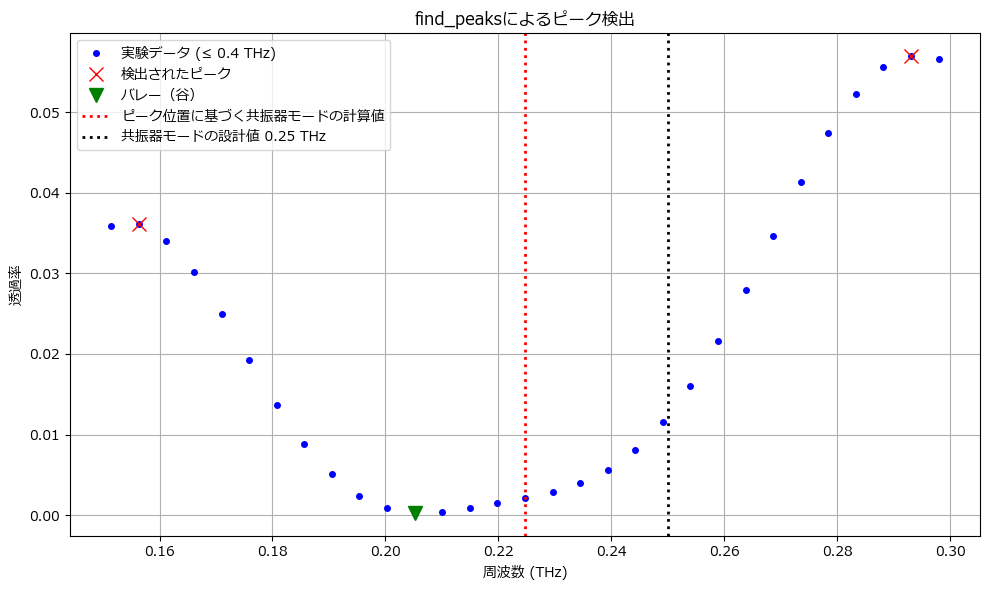

In [32]:
from scipy.signal import find_peaks
# a) ピーク（極大値）の検出
peak_indicates, properties = find_peaks(exp_transmittance_filtered, prominence=1e-4)

peak_data = df_filtered.iloc[peak_indicates]

print("--- 検出されたピーク ---")
print(peak_data)
print("-" * 30) 

# まず、ピークが1つ以上見つかっているかを確認
if not peak_data.empty:
    # 'Transmittance'列の平均値を取得
    avarage_peak_transmittance = peak_data["Transmittance"].mean()

    # 'Frequency (THz)' 列の平均値を計算
    average_peak_frequency = peak_data['Frequency (THz)'].mean()
    print(f"ピーク位置（周波数）の平均値: {average_peak_frequency:.4f} THz")
else:
    print("ピークが見つからなかったため、平均値は計算できません。")

# b) バレー（極小値）の検出
# ★★★ データを反転させて、そのピークを探す ★★★
y_inverted = -exp_transmittance_filtered
valley_indices, _ = find_peaks(y_inverted, prominence=1e-4)
valley_data = df_filtered.iloc[valley_indices]
valley_frequency = valley_data['Frequency (THz)'].min()
delta_cavity_mode = np.abs(average_peak_frequency - valley_frequency) / valley_frequency * 100
print("\n--- 検出されたバレー（谷）---")
print(valley_data)
print(
    f"\n 共振器モードの誤差：{delta_cavity_mode:.4f} %"
)

# --- 3. 結果の可視化 ---
fig, ax = plt.subplots(figsize=(10, 6))

# 元のデータをプロット
ax.plot(exp_freq_filtered, exp_transmittance_filtered, 'o', color='blue', markersize=4, label='実験データ (≤ 0.4 THz)')

# 検出されたピークをプロット
ax.plot(peak_data['Frequency (THz)'], peak_data['Transmittance'], 
        'x', color='red', markersize=10, label='検出されたピーク')

# 検出されたバレーをプロット
ax.plot(valley_data['Frequency (THz)'], valley_data['Transmittance'], 
        'v', color='green', markersize=10, label='バレー（谷）', zorder=2)

# 理論的な共振器モードをプロット
ax.axvline(
    x=average_peak_frequency,
    color='red',
    linestyle=':',
    linewidth=2,
    label='ピーク位置に基づく共振器モードの計算値'
)

# 共振器モードの設計値をプロット
ax.axvline(
    x=0.25,
    color='black',
    linestyle=':',
    linewidth=2,
    label='共振器モードの設計値 0.25 THz'
)

# グラフの装飾
ax.set_xlabel('周波数 (THz)')
ax.set_ylabel('透過率')
ax.set_title('find_peaksによるピーク検出')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()